### Calculus II
##### [Hiroyuki Chihara](https://fiomfd.github.io/) (University of the Ryukyus, Okinawa Island, Japan)

1. Tangent planes
2. Polar coordinates
3. Newton's method and gradiend descent
4. Riemann sums and Riemann integrals

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False
import numpy as np
import math
import matplotlib
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import FloatSlider, IntSlider, interact, interactive_output, VBox
from matplotlib.patches import FancyArrowPatch
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

### Tangent Plane of a Surface
Suppose that $f(x,y)$ is a $C^1$-function. Then $f(x,y)$ is totally differentiable everywhere. Consider a surface $z=f(x,y)$. Its tangent plane $z=h(x,y)$ at 
$\bigl(a,b,f(a,b)\bigr)$ is given by 

$h(x,y):=f(a,b)+f_x(a,b)(x-a)+f_y(a,b)(y-b).$

We observe the relation of $z=f(x,y)$, $z=h(x,y)$, $f_x(a,b)$ and $f_y(a,b)$ near the tngent point $\bigl(a,b,f(a,b)\bigr)$.

In [4]:
x = np.linspace(-1.2, 1.2, 49)
y = np.linspace(-1.2, 1.2, 49)
X, Y = np.meshgrid(x, y, indexing="xy")

def f(X, Y):
    # z = 1 - x^2 - y^2
    return 1 - X**2 - Y**2

def tangent_plane(X, Y, a, b):
    # f(a,b) - 2a(x-a) - 2b(y-b) = 1 + a^2 + b^2 - 2ax - 2by
    return (1 - a**2 - b**2) - 2*a*(X - a) - 2*b*(Y - b)

Z = f(X, Y)

def tangential(a=-0.4,b=-0.4,latitude=0,longitude=-150):
    na=np.int64(np.floor(20*a+25))
    nb=np.int64(np.floor(20*b+25))
    xx = np.linspace(a, a+0.5, 11)
    yy = np.linspace(b, b+0.5, 11)
    A=a*np.ones(11)
    B=b*np.ones(11)
    XX, YY = np.meshgrid(xx, yy, indexing="ij")
    ZZ=f(XX,YY)
    zx=1 - xx**2 - b**2
    hx=(1 - a**2 - b**2) - 2*a*(xx - a)
    zy=1 - a**2 - yy**2
    hy=(1 - a**2 - b**2) - 2*b*(yy - b)
    
    fig, (ax1, ax2) = plt.subplots(1, 2,     
                                   subplot_kw={'projection': '3d'},
                                   figsize=(10,4.5),
                                   constrained_layout=True
                                  )
    
    ax1.set_title('z=f(x,y) and its tangent plane at (a,b,f(a,b))')
    ax1.set_zlim([-2,4])
    ax1.set_xticks([-1,0,1])
    ax1.set_yticks([-1,0,1])
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.plot_surface(X, Y, Z, alpha=0.7, linewidth=0, antialiased=True, color="C7")
    Zt = tangent_plane(X, Y, a, b)
    ax1.plot_surface(X, Y, Zt, alpha=0.4, linewidth=0, antialiased=True, color="C1")
    ax1.scatter([a], [b], [1 - a**2 - b**2], s=40, color="green")
    ax1.view_init(elev=latitude,azim=longitude)

    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_zlabel('z')   
    ax2.plot_surface(XX, YY, ZZ, alpha=0.7, linewidth=0, antialiased=True, color="C7")
    ZZt=tangent_plane(XX, YY, a, b)
    ax2.plot_surface(XX, YY, ZZt, alpha=0.3, linewidth=0, antialiased=True, color="C1")
    ax2.scatter([a], [b], [1 - a**2 - b**2], s=40, color="green")
    ax2.plot(xx,B,zx,color="cyan",linewidth=2)
    ax2.plot(xx,B,hx,color="blue",linewidth=2)
    ax2.plot(A,yy,zy,color="magenta",linewidth=2)
    ax2.plot(A,yy,hy,color="red",linewidth=2)

    ax2.view_init(elev=latitude,azim=longitude)

interact(tangential, a=(-0.7, 0.7, 0.1), b=(-0.7, 0.7, 0.1), latitude=(-50, 50, 1), longitude=(-180,180,1));

interactive(children=(FloatSlider(value=-0.4, description='a', max=0.7, min=-0.7), FloatSlider(value=-0.4, des…

### 2D Polar Coordinate System
$(x,y)=(r\cos\theta,r\sin\theta),\quad (r,\theta)=[0,\infty)\times[0,2\pi).$

In [5]:
theta1=np.linspace(0,359,360)
COS=np.cos(2*math.pi*theta1/360)
SIN=np.sin(2*math.pi*theta1/360)

def polar2d(r=3,theta=135):
    plt.figure(figsize=(5,5))
    plt.plot(4.2*COS,4.2*SIN,color="#ffffff")
    plt.arrow(-4.2, 0, 8.4, 0, 
          head_width=0.2, head_length=0.3, linewidth=0.3,
          length_includes_head=True)
    plt.arrow(0,-4.2, 0, 8.4, 
          head_width=0.2, head_length=0.3, linewidth=0.3,
          length_includes_head=True)
    plt.plot(r*COS[0:theta],r*SIN[0:theta],color="green")
    plt.plot([0,r*np.cos(2*math.pi*theta/360)],[0,r*np.sin(2*math.pi*theta/360)],color="blue", linewidth=1)
    plt.plot([r*np.cos(2*math.pi*theta/360),r*np.cos(2*math.pi*theta/360)],[0,r*np.sin(2*math.pi*theta/360)],linewidth=0.5, linestyle=":")
    plt.plot([0,r*np.cos(2*math.pi*theta/360)],[r*np.sin(2*math.pi*theta/360),r*np.sin(2*math.pi*theta/360)],linewidth=0.5, linestyle=":")
    plt.xlim([-4.3,4.3])
    plt.ylim([-4.3,4.3])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter([r*np.cos(2*math.pi*theta/360)],[r*np.sin(2*math.pi*theta/360)],color="magenta")
    plt.axis('equal')
    plt.show()

interact(polar2d, r=(0, 4, 0.1), theta=(0, 359));

interactive(children=(FloatSlider(value=3.0, description='r', max=4.0), IntSlider(value=135, description='thet…

### 3D Polar Coordinate System
$(x,y,z)=(r\sin\theta\cos\varphi, r\sin\theta \sin\varphi,r\cos\theta),
\quad
(r,\theta,\varphi)\in[0,\infty)\times[0,\pi]\times[0,2\pi).$

In [6]:
R = 4.0

def xyz_from_rtp(r, theta_deg, phi_deg):
    th = np.deg2rad(theta_deg); ph = np.deg2rad(phi_deg)
    x = r*np.sin(th)*np.cos(ph)
    y = r*np.sin(th)*np.sin(ph)
    z = r*np.cos(th)
    return x, y, z, th, ph

def arc_phi(ax, radius, phi, **kw):
    t = np.linspace(0.0, phi, max(2, int(abs(np.degrees(phi))) + 2))
    ax.plot(radius*np.cos(t), radius*np.sin(t), 0*t, **kw)

def arc_theta(ax, radius, theta, phi, **kw):
    u = np.array([np.cos(phi), np.sin(phi), 0.0]) 
    t = np.linspace(0.0, theta, max(2, int(abs(np.degrees(theta))) + 2))
    x = radius*np.sin(t)*u[0]; y = radius*np.sin(t)*u[1]; z = radius*np.cos(t)
    ax.plot(x, y, z, **kw)

def update(r, theta, phi):
    x, y, z, th, ph = xyz_from_rtp(r, theta, phi)

    fig = plt.figure(figsize=(5.5, 5.5))
    ax  = fig.add_subplot(111, projection='3d')

    ax.plot([-R*1.05, R*1.05], [0, 0], [0, 0], color='k', lw=1)
    ax.plot([0, 0], [-R*1.05, R*1.05], [0, 0], color='k', lw=1)
    ax.plot([0, 0], [0, 0], [-R*1.05, R*1.05], color='k', lw=1)
    ax.set(xlim=(-R, R), ylim=(-R, R), zlim=(-R, R))
    ax.set_box_aspect([1, 1, 1])
    ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
    ax.grid(False)
    ax.text(0, 0, R*1.08, "z"); ax.text(R*1.25, 0, 0, "x"); ax.text(0, R*1.08, 0, "y")

    ax.plot([0, x], [0, y], [0, z], lw=3, color='royalblue')       
    ax.plot([0, x], [0, y], [0, 0], lw=2, color='forestgreen')    
    ax.plot([x, x], [y, y], [0, z], lw=1.2, ls='--', color='0.3')
    ax.plot([0, x], [0, y], [z, z], lw=1.2, ls='--', color='0.3')
    ax.plot([0, x], [y, y], [0, 0], lw=1.2, ls='--', color='0.3')
    ax.plot([x, x], [0, y], [0, 0], lw=1.2, ls='--', color='0.3')
    ax.scatter([x], [y], [z], s=50, color='red', zorder=5)   
    ax.scatter([x], [y], [0], s=50, color='green', zorder=5)  

    arc_phi(ax,   r*np.sin(math.pi*theta/180), ph, color='magenta', lw=2) 
    arc_theta(ax, r, th, ph, color='skyblue', lw=2)      

    ax.view_init(elev=12, azim=25)
    plt.show()

interact(
    update,
    r=FloatSlider(value=3.5, min=0.0, max=R,   step=0.1, description="r"),
    theta=IntSlider(value=30,  min=0,   max=180, step=1,   description="theta"),
    phi=IntSlider(value=150,    min=0,   max=359, step=1,   description="phi"),
);

interactive(children=(FloatSlider(value=3.5, description='r', max=4.0), IntSlider(value=30, description='theta…

### Newton's Method vs Gradient Descent
Given a smooth funtion 

$f:\mathbb{R}^n\ni\vec{x}=[x_1,\dotsc,x_n]^T \mapsto f(\vec{x})\in\mathbb{R}$ 

and an initial point $\vec{x}_0\in\mathbb{R}^n$, 

- Newton's method formally defines a sequence $\{\vec{x}_n\}_{n=1,2,3,\dotsc}$ by 

$\vec{x}_{n+1}:=\vec{x}_n-\bigl(\nabla^2f(\vec{x}_n)\bigr)^{-1}{\nabla}f(\vec{x}_n), 
\quad n=1,2,3,\dotsc.$

- The Gradient descent defines a sequence $\{\vec{x}_n\}_{n=1,2,3,\dotsc}$ by 

$\vec{x}_{n+1}:=\vec{x}_n-s{\nabla}f(\vec{x}_n), \quad n=1,2,3,\dotsc,\quad s>0.$

In [7]:
N5=100;
x = np.linspace(-1.7, 0.9, 27)
y = np.linspace(-1.3, 1.3, 27)
X, Y = np.meshgrid(x, y, indexing="xy")

def f(X, Y):
    return 2*X**3 + X*Y**2 + 5*X**2 + Y**2

Z = f(X, Y)

def newton(x0=0.8,y0=0.8,stepsize=0.02,n=0):
    Y4=np.zeros((N5+1,3))
    Y4[0,0]=x0
    Y4[0,1]=y0
    z0=2*x0**3+x0*y0**2+5*x0**2+y0**2
    Y4[0,2]=z0
    Y5=np.zeros((N5+1,3))
    Y5[0,0]=x0
    Y5[0,1]=y0
    Y4[0,2]=z0
    for k in range(1, N5):
        D=12*Y4[k-1,0]**2-2*Y4[k-1,1]**2+22*Y4[k-1,0]+10;
        Y4[k,0]=(12*Y4[k-1,0]**3-2*Y4[k-1,0]*Y4[k-1,1]**2+21*Y4[k-1,0]**2+Y4[k-1,1]**2+9*Y4[k-1,0])/D;
        Y4[k,1]=Y4[k-1,1]*(12*Y4[k-1,0]**2-Y4[k-1,1]**2+17*Y4[k-1,0]+5)/D;
        Y4[k,2]=2*Y4[k,0]**3+Y4[k,0]*Y4[k,1]**2+5*Y4[k,0]**2+Y4[k,1]**2;
        Y5[k,0]=Y5[k-1,0]-stepsize*(6*Y5[k-1,0]**2+Y5[k-1,1]**2+10*Y5[k-1,0]);
        Y5[k,1]=Y5[k-1,1]-stepsize*(2*Y5[k-1,0]*Y5[k-1,1]+2*Y5[k-1,1]);
        Y5[k,2]=2*Y5[k,0]**3+Y5[k,0]*Y5[k,1]**2+5*Y5[k,0]**2+Y5[k,1]**2;

    fig = plt.figure(figsize=(6, 6), facecolor='w')
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("Newton's Method vs Gradient Descent")
    ax.set_xlim(-1.7, 0.9)
    ax.set_ylim(-1.3, 1.3)
    ax.set_zlim(0, 9)
    ax.set_axis_off()
    ax.view_init(elev=30, azim=240)
    plt.draw()                    
    ax.plot_surface(X, Y, Z, alpha=0.5, linewidth=0, antialiased=True, color="C7")
    ax.scatter([Y4[1:n,0]], [Y4[1:n,1]], [Y4[1:n,2]], s=5, color='red', label="Newton's Method") 
    ax.scatter([Y5[1:n,0]], [Y5[1:n,1]], [Y5[1:n,2]], s=5, color='magenta', label='Gradient Descent')
    ax.scatter([x0], [y0], [z0], s=20, color='green', label='(x0,y0)') 
    ax.scatter([0], [0], [0], s=20, color='blue', label='Minimal Point') 
    ax.legend()
    plt.show()

interact(newton, x0=(-1,1,0.1), y0=(-1,1,0.1), stepsize=(0.01,0.1,0.01), n=(0,N5));

interactive(children=(FloatSlider(value=0.8, description='x0', max=1.0, min=-1.0), FloatSlider(value=0.8, desc…

### Riemann Sum

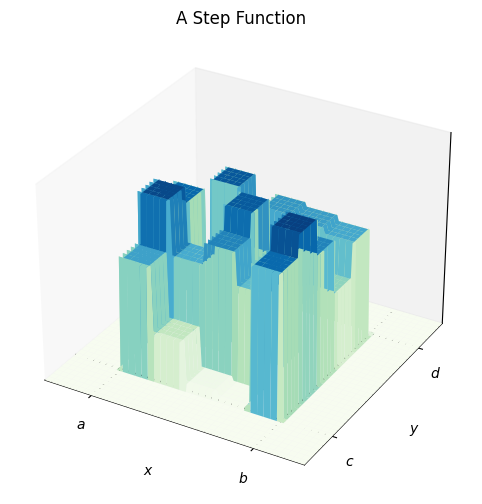

In [8]:
n8 = 5
N8 = 100
x8 = np.linspace(-0.3, 1.3, N8 + 61)
y8 = np.linspace(-0.3, 1.3, N8 + 61)
rng = np.random.default_rng(0)
R8 = rng.random((n8, n8))
z8 = np.zeros((N8 + 61, N8 + 61))
z8[29, 29] = R8[0, 0]

for k in range(N8): 
    z8[29, 30 + k] = R8[0, k // 20] 
    z8[30 + k, 29] = R8[k // 20, 0] 
    for l in range(N8):
        z8[30 + k, 30 + l] = R8[k // 20, l // 20]
        
X8, Y8 = np.meshgrid(x8, y8, indexing="xy")

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X8, Y8, z8, cmap="GnBu", linewidth=0, antialiased=True)
ax.set_title("A Step Function")

ax.set_xlim(-0.3, 1.3)
ax.set_ylim(-0.3, 1.3)
ax.set_zlim(0, 1.1)

ax.set_xticks([0, 1]); ax.set_xticklabels([r"$a$", r"$b$"])
ax.set_yticks([0, 1]); ax.set_yticklabels([r"$c$", r"$d$"])
ax.set_zticks([])

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel(r"$z$")
ax.grid(False)

ax.plot([-0.3, 1.3], [0, 0],   [0, 0],   linestyle="--", linewidth=1, color="black")
ax.plot([1, 1.3],   [1, 1],   [0, 0],   linestyle="--", linewidth=1, color="black")
ax.plot([1, 1],     [-0.3, 1.3], [0, 0], linestyle="--", linewidth=1, color="black")
ax.plot([0, 0],     [-0.3, 0], [0, 0],   linestyle="--", linewidth=1, color="black")

plt.show()

### Convergence of Riemann Sum
Given a continuous function $f(x,y)$ on $I=[a,b]\times[c,d]$. Theoretically $f(x,y)$ is Riemann integrable. 

We have a division of $I$ splitting $[a,b]$ and $[c,d]$ into $n$-equal parts respectively:

$I_{jk}=\left[a+\dfrac{(b-a)(j-1)}{n},a+\dfrac{(b-a)j}{n}\right]\times\left[c+\dfrac{(d-c)(k-1)}{n},c+\dfrac{(d-c)k}{n}\right].$

Pick up arbitrary $(x_{jk},y_{jk}) \in I_{jk}$. Define a Riemann sum $R_n$ of $f(x,y)$ by 

$R_n
=
\displaystyle\sum_{j=1}^n
\displaystyle\sum_{k=1}^n
f(x_{jk},y_{jk})\lvert{I_{jk}}\rvert
=
\dfrac{(b-a)(d-c)}{n^2}
\displaystyle\sum_{j=1}^n
\displaystyle\sum_{k=1}^n
f(x_{jk},y_{jk}).$

Then 

$R_n \rightarrow 
\displaystyle\iint_{I}f(x,y)dxdy \quad (n \rightarrow \infty).$

In [9]:
def f(x, y):
    return 3 - x**2 - y**2

a, b = -1.0, 1.0
c, d = -1.0, 1.0

exact = 16/3  # ∫_{-1}^1 ∫_{-1}^1 (2 - x^2 - y^2) dx dy

def update(n):
    n = max(1, int(n))
    dx = (b - a) / n
    dy = (d - c) / n

    xi = a + (np.arange(n) + 0.5) * dx
    yj = c + (np.arange(n) + 0.5) * dy
    Xs, Ys = np.meshgrid(xi, yj, indexing="xy")
    Zh = f(Xs, Ys).clip(min=0.0)  

    x0 = a + np.arange(n) * dx
    y0 = c + np.arange(n) * dy
    X0, Y0 = np.meshgrid(x0, y0, indexing="xy")
    X0r, Y0r, Zhr = X0.ravel(), Y0.ravel(), Zh.ravel()

    approx = float(Zhr.sum() * dx * dy)
    err = abs(approx - exact)

    fig = plt.figure(figsize=(6, 6))
    fig.suptitle("Convergence of Riemann Sum", y=0.92, fontsize=14)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect([1,1,0.6])
    ax.set_xlim(a, b); ax.set_ylim(c, d); ax.set_zlim(0, 2.2)
    ax.set_xlabel(r"$x$"); ax.set_ylabel(r"$y$"); ax.set_zlabel(r"$z$")
    ax.grid(False)
    ax.view_init(elev=22, azim=-50)

    Xb, Yb = np.meshgrid([a, b], [c, d], indexing="xy")
    Zb = np.zeros_like(Xb)
    ax.plot_surface(Xb, Yb, Zb, alpha=0.12, linewidth=0, antialiased=True)

    ax.plot([a,b],[c,c],[0,0], ls="--", lw=1, color="0.4")
    ax.plot([a,b],[d,d],[0,0], ls="--", lw=1, color="0.4")
    ax.plot([a,a],[c,d],[0,0], ls="--", lw=1, color="0.4")
    ax.plot([b,b],[c,d],[0,0], ls="--", lw=1, color="0.4")
    ax.text(a, c-0.05, 0, r"$a$", ha="center", va="top")
    ax.text(b, c-0.05, 0, r"$b$", ha="center", va="top")
    ax.text(a-0.05, c, 0, r"$c$", ha="right", va="center", rotation=90)
    ax.text(a-0.05, d, 0, r"$d$", ha="right", va="center", rotation=90)

    norm = plt.Normalize(Zhr.min(), Zhr.max() if Zhr.max()>0 else 1.0)
    colors = cm.Blues(norm(Zhr))

    ax.bar3d(X0r, Y0r, np.zeros_like(Zhr), dx, dy, Zhr, shade=True, color=colors)

    fig.text(0.14, 0.86, rf"$n={n}\quad$ Riemann sum $\approx$ {approx:.5f}  "
                         rf"(exact $=16/3\approx{exact:.5f}$,  error $={err:.2e}$)")

    plt.show()

interact(update, n=IntSlider(value=1, min=1, max=120, step=1, description=r"$n=$"));

interactive(children=(IntSlider(value=1, description='$n=$', max=120, min=1), Output()), _dom_classes=('widget…